### Load the packages and functions

In [1]:
%run artifactpackage.ipynb
%run Confusionmatrix.ipynb
%run masrur_ploting_utils.ipynb

2023-11-06 10:00:55.804962: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-06 10:00:55.808638: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 10:00:55.888221: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 10:00:55.889085: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 10:00:57.329097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Load the training and test datasets

In [2]:
dr = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/balanced_testdata_smote.csv')
dr

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,40,12,1.380512e+01,0,310.075595,2092,52.300000,12403,310.075595,0,...,222,26,27,118,0,123,88,0,8,0
1,40,12,1.375000e+01,0,304.275000,2064,51.600000,12171,304.275000,0,...,222,26,27,118,0,124,88,0,8,0
2,44,13,1.257603e+01,0,279.283605,2170,48.909541,12395,279.283605,0,...,222,26,27,118,0,124,88,0,8,0
3,42,12,1.305386e+01,0,292.704269,2082,49.592771,12293,292.704269,0,...,222,26,27,118,0,124,88,0,8,0
4,44,18,1.231995e+01,0,249.157298,1948,43.492821,11161,254.260744,0,...,222,26,24,118,0,122,87,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,70,23,1.619473e+01,0,-0.046099,2807,41.742343,26194,401.463245,0,...,0,0,0,0,0,0,45,0,17,1
58592,70,26,8.722529e+06,0,-0.055493,3244,46.547200,22816,351.549719,0,...,0,0,0,0,0,0,52,0,21,1
58593,56,15,1.921973e+01,0,-0.053469,2959,54.108703,2916,57.062568,0,...,0,0,0,0,0,0,44,0,19,1
58594,63,21,5.245772e+07,0,-0.048434,2991,50.956635,22789,397.017012,0,...,0,0,0,0,0,0,47,1,18,1


In [3]:
dc = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/balanced_traindata_smote.csv')
dc

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,39,12,12.662889,0,291.115783,1938,49.708500,11353,291.839501,0,...,222,26,27,118,0,123,88,0,8,0
1,44,13,12.448646,0,275.954252,2187,48.631396,12412,275.954252,0,...,222,26,27,118,0,124,88,0,8,0
2,47,17,11.399939,0,255.023716,2104,44.774123,12184,259.252623,0,...,222,26,24,118,0,126,87,0,8,0
3,42,12,13.404762,0,294.736143,2085,49.642857,12378,294.736143,0,...,222,26,27,118,0,126,88,0,8,0
4,42,12,11.951040,0,263.369888,1934,46.053991,11064,282.421473,0,...,222,26,27,118,0,123,88,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,45,12,13.472076,0,308.529142,2360,52.444444,13883,308.529142,0,...,222,26,27,118,0,124,88,0,8,0
58592,39,12,12.549406,0,281.204157,1932,49.538462,10966,281.204157,0,...,222,26,27,118,0,124,88,0,8,0
58593,30,13,14.161476,0,260.159590,1341,44.254113,7886,260.159590,0,...,222,26,27,118,0,115,88,0,8,0
58594,41,13,13.564357,0,313.110020,2130,51.956855,12836,313.110020,0,...,222,26,27,118,0,124,88,0,8,0


In [6]:
features = dc.drop('Class', axis=1).values
Class = dc['Class'].values
X_train=dc.drop(columns='Class')
y_train=dc['Class']

In [7]:
features = dr.drop('Class', axis=1).values
Class = dr['Class'].values
X_test=dr.drop(columns='Class')
y_test=dr['Class']

## Machine learning Model Build 

### Model_1: Decision Tree

In [8]:
Dt_classifier= DecisionTreeClassifier(random_state=29)
Dt_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_dt = Dt_classifier.predict(X_train)
y_pred_test_dt = Dt_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f"Training Accuracy: {accuracy_train_dt}")
print(f"Test Accuracy: {accuracy_test_dt}")

Training Accuracy: 1.0
Test Accuracy: 0.9998805379206772


In [9]:
filename_dt= 'Binary_security_dt_sm.sav'
pickle.dump(Dt_classifier, open(filename_dt, 'wb'))
load_model_dt=pickle.load(open('Binary_security_dt_sm.sav','rb'))
load_pred_dt=load_model_dt.predict(X_test)

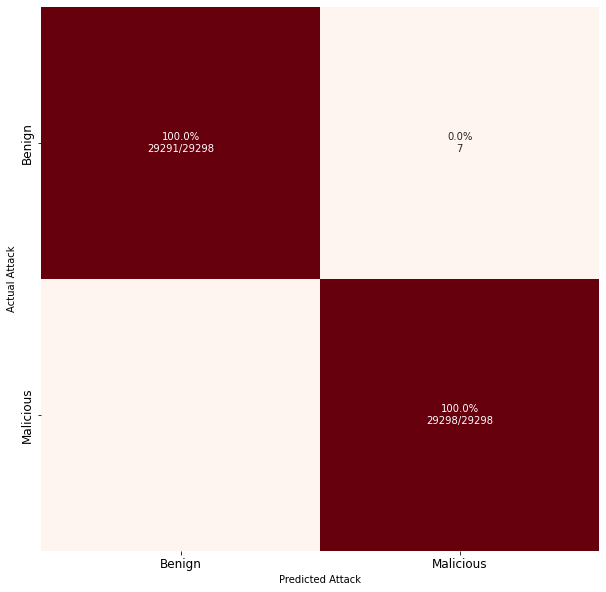

In [10]:
plot_cm(y_test, load_pred_dt)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
44                       svcscan.nservices    0.985582
47                svcscan.process_services    0.006793
8             handles.avg_handles_per_proc    0.003767
7                         handles.nhandles    0.001027
51                    callbacks.ncallbacks    0.000809
27                    malfind.commitCharge    0.000682
39    psxview.not_in_pspcid_list_false_avg    0.000347
11                          handles.nevent    0.000273
10                           handles.nfile    0.000267
48         svcscan.shared_process_services    0.000189
12                        handles.ndesktop    0.000068
40  psxview.not_in_csrss_handles_false_avg    0.000065
20                  ldrmodules.not_in_load    0.000063
23              ldrmodules.not_in_load_avg    0.000059
19                         handles.nmutant    0.000010
33            psxview.not_in_csrss_handles    0.000000
34                  psxview.not_in_session    0.000000
35        

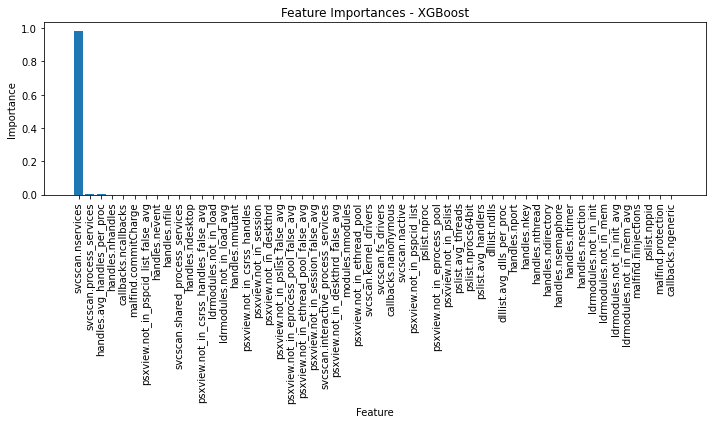

In [11]:
# Get the feature importance scores from the trained Decision Tree model
feature_importance = Dt_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

In [12]:
# Initialize  model
Dt_classifier = DecisionTreeClassifier(random_state=29)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(Dt_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Model_2: Random forest

In [13]:
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf=rf_classifier.predict(X_test)
# Predict on training and test sets
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Training Accuracy: {accuracy_train_rf}")
print(f"Test Accuracy: {accuracy_test_rf}")

Training Accuracy: 1.0
Test Accuracy: 0.9999829339886682


In [14]:
filename_rf= 'Binary_security_rf_sm.sav'
pickle.dump(rf_classifier, open(filename_rf, 'wb'))
load_model_dt=pickle.load(open('Binary_security_rf_sm.sav','rb'))
load_pred_rf=load_model_dt.predict(X_test)

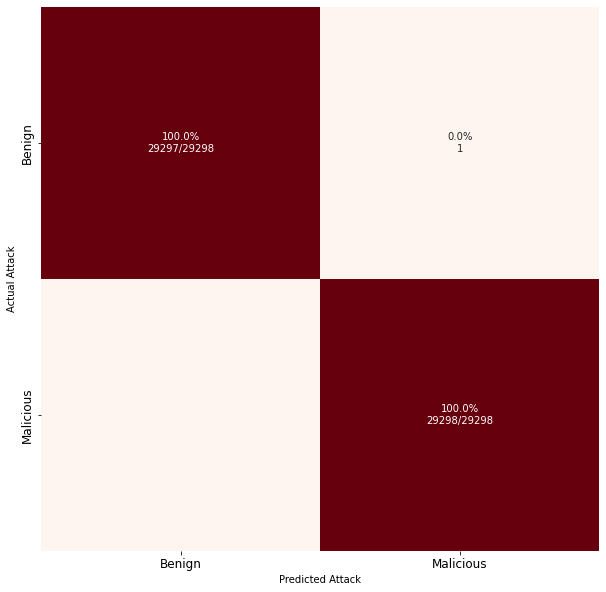

In [15]:
plot_cm(y_test, load_pred_rf)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
45                  svcscan.kernel_drivers    0.110729
44                       svcscan.nservices    0.106801
11                          handles.nevent    0.104897
19                         handles.nmutant    0.096513
48         svcscan.shared_process_services    0.094170
8             handles.avg_handles_per_proc    0.072582
7                         handles.nhandles    0.066027
4                      pslist.avg_handlers    0.059143
6                dlllist.avg_dlls_per_proc    0.059011
13                            handles.nkey    0.046921
16                      handles.nsemaphore    0.039768
18                        handles.nsection    0.029174
10                           handles.nfile    0.024639
17                          handles.ntimer    0.017189
47                svcscan.process_services    0.014228
20                  ldrmodules.not_in_load    0.010332
5                            dlllist.ndlls    0.009673
22        

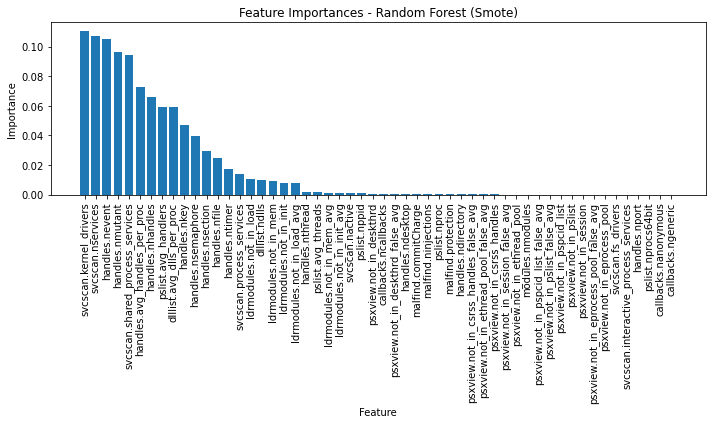

In [16]:
# Get the feature importance scores from the trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest (Smote)')
plt.tight_layout()
plt.show()

In [17]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Model_3: LGBM

In [18]:
lgb_nor=lgb.LGBMClassifier(n_jobs= -1)
lgb_nor.fit(X_train,y_train)
y_pred_lgbm =lgb_nor.predict(X_test)
print(y_pred_lgbm)
cohen_kappa_score(y_test,y_pred_lgbm)

[0 0 0 ... 1 1 1]


1.0

In [19]:
# Predict on training and test sets
y_pred_train_lgb = lgb_nor.predict(X_train)
y_pred_test_lgb = lgb_nor.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_lgb = accuracy_score(y_train, y_pred_train_lgb)
accuracy_test_lgb = accuracy_score(y_test, y_pred_test_lgb)

print(f"Training Accuracy: {accuracy_train_lgb}")
print(f"Test Accuracy: {accuracy_test_lgb}")

Training Accuracy: 1.0
Test Accuracy: 1.0


In [20]:
print("",classification_report(y_test,y_pred_lgbm))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29298
           1       1.00      1.00      1.00     29298

    accuracy                           1.00     58596
   macro avg       1.00      1.00      1.00     58596
weighted avg       1.00      1.00      1.00     58596



In [21]:
accuracy = lgb_nor.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [22]:
filename_lgbm= 'Binary_security_lgbm_rm.sav'
pickle.dump(lgb_nor, open(filename_lgbm, 'wb'))
load_model_lgbm=pickle.load(open('Binary_security_lgbm_sm.sav','rb'))
load_pred_lgbm=load_model_lgbm.predict(X_test)

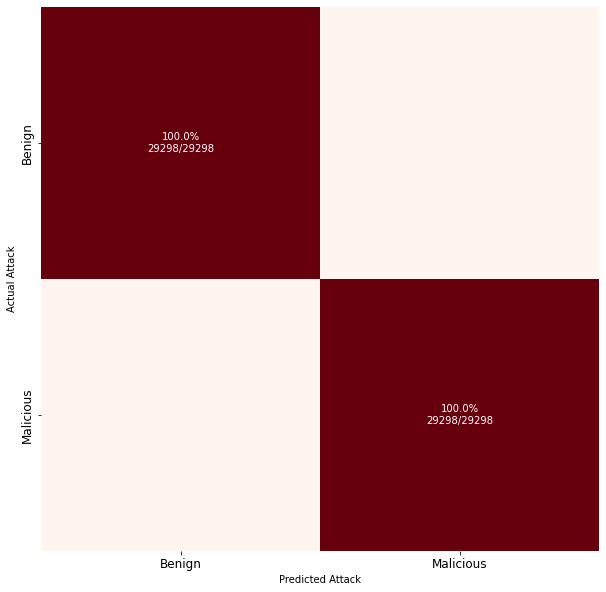

In [23]:
plot_cm(y_test, load_pred_lgbm)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
45                  svcscan.kernel_drivers    0.110729
44                       svcscan.nservices    0.106801
11                          handles.nevent    0.104897
19                         handles.nmutant    0.096513
48         svcscan.shared_process_services    0.094170
8             handles.avg_handles_per_proc    0.072582
7                         handles.nhandles    0.066027
4                      pslist.avg_handlers    0.059143
6                dlllist.avg_dlls_per_proc    0.059011
13                            handles.nkey    0.046921
16                      handles.nsemaphore    0.039768
18                        handles.nsection    0.029174
10                           handles.nfile    0.024639
17                          handles.ntimer    0.017189
47                svcscan.process_services    0.014228
20                  ldrmodules.not_in_load    0.010332
5                            dlllist.ndlls    0.009673
22        

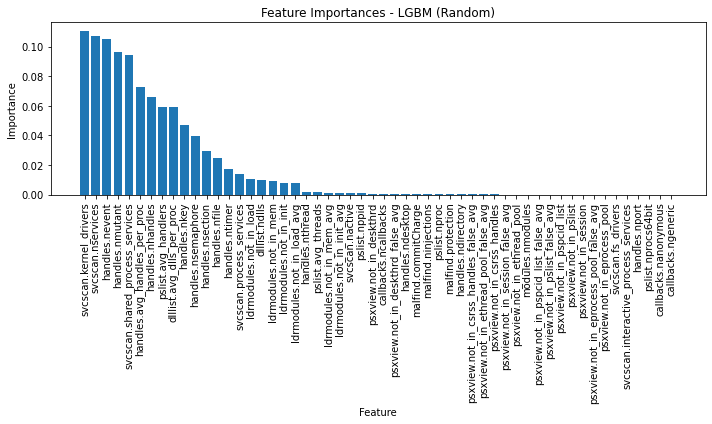

In [24]:
# Get the feature importance scores from the trained LGBM model
feature_importance = lgb_nor.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_lgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_lgb = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_lgb)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - LGBM (Random)')
plt.tight_layout()
plt.show()

In [25]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(lgb_nor, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Model_4: GaussianNB

In [26]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_nb = nb_classifier.predict(X_train)
y_pred_test_nb = nb_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Training Accuracy: {accuracy_train_nb}")
print(f"Test Accuracy: {accuracy_test_nb}")

Training Accuracy: 0.9919107106287118
Test Accuracy: 0.9946924704758004


In [28]:
filename_nb= 'Binary_security_nb_sm.sav'
pickle.dump(nb_classifier, open(filename_nb, 'wb'))
load_model_nb=pickle.load(open('Binary_security_nb_sm.sav','rb'))
load_pred_nb=load_model_nb.predict(X_test)

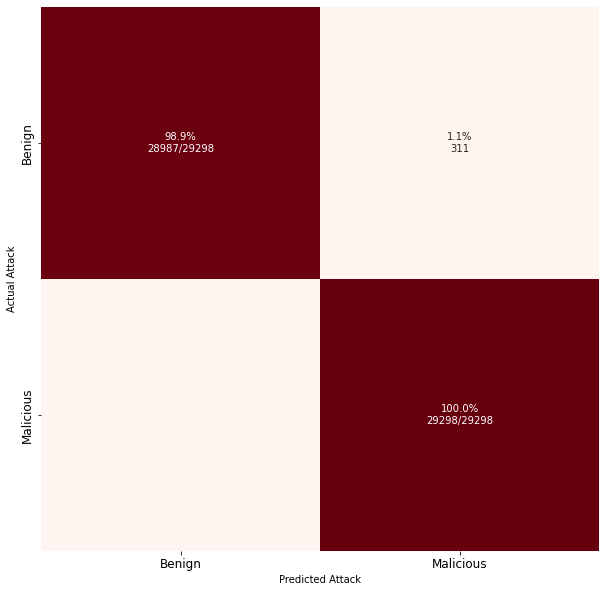

In [29]:
plot_cm(y_test, load_pred_nb)
plt.savefig('cm.eps',dpi=600)

In [30]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(nb_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


# ROC 

In [31]:
# Fit the classifiers with training data
Dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
lgb_nor.fit(X_train, y_train)

LGBMClassifier()

In [32]:
proba_df = pd.DataFrame({
       
    'DECISIONTREE':Dt_classifier.predict_proba(X_test)[:,1],
    'RANDOMFORREST':rf_classifier.predict_proba(X_test)[:,1],
    'LGBM':lgb_nor.predict_proba(X_test)[:,1],
    'NB':nb_classifier.predict_proba(X_test)[:,1],
    })
proba_df

,DECISIONTREE,RANDOMFORREST,LGBM,NB
0,0.0,0.00,0.000022,3.410547e-74
1,0.0,0.00,0.000022,2.571815e-71
2,0.0,0.00,0.000022,3.054873e-63
3,0.0,0.00,0.000022,9.746829e-59
4,0.0,0.00,0.000022,5.219030e-30
...,...,...,...,...
58591,1.0,0.80,0.999169,1.000000e+00
58592,1.0,0.82,0.999163,1.000000e+00
58593,1.0,0.95,0.999929,1.000000e+00
58594,1.0,0.78,0.998813,1.000000e+00


In [33]:
proba_df.to_csv('probability.csv')

DECISIONTREE
  AUC: 1.0
RANDOMFORREST
  AUC: 1.0
LGBM
  AUC: 1.0
NB
  AUC: 0.997


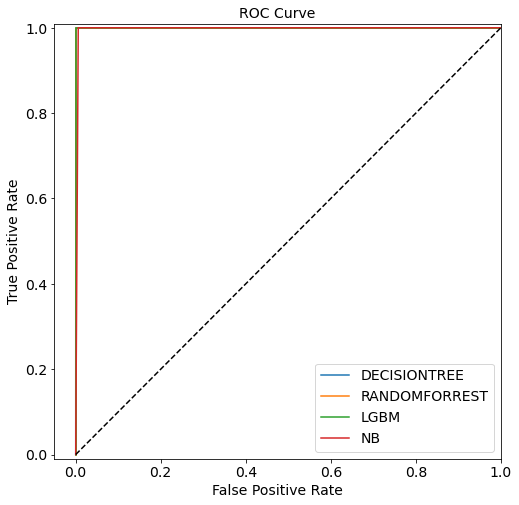

In [34]:
filename_ROC='ROC_curve_Binary_security.png'
plot_roc_curves(proba_df, y_test,filename_ROC)

# Performance Metrics

In [35]:
#estimator and names fuction
def est(clf,names):
    estm=[]
    for i in range(len(clf)):
        n=names[i]
        claf=clf[i]
        estm.append((n,claf))
    return estm
clf=[Dt_classifier,rf_classifier,lgb_nor,nb_classifier]
name=['DecisionTree','RandomForest','LightGBM','NB']
est_1=est(clf,name)

In [36]:
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}


for algorithm, model in est_1:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob
    
    cross_val_scores[algorithm] = cross_val_score(model, X_train, y_train, cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test, y_pred)
    ppv_scores[algorithm] = precision_score(y_test, y_pred, average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test, y_pred, average="weighted")
    confusion_matrix_= confusion_matrix(y_test, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)  
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP/(FP+TN)).mean()
    specificity_scores[algorithm] = (TN/(TN+FP)).mean()
    threat_scores[algorithm] = (TP/(TP+FN+FP)).mean()
    balanced_accuracy_scores[algorithm] = ((sensitivity_scores[algorithm] + specificity_scores[algorithm])/2).mean()
    print('done for one')


done for one
done for one
done for one
done for one


In [37]:
performance_metrics = {
    'cross_val_scores': cross_val_scores,
    'accuracy_scores': accuracy_scores,
    'error_scores': error_scores,
    'f1_scores': f1_scores,
    'fpr_scores': fpr_scores,
    'kappa_scores': kappa_scores,
    'mcc_scores': mcc_scores,
    'ppv_scores': ppv_scores,
    'sensitivity_scores': sensitivity_scores,
    'specificity_scores': specificity_scores,
    'threat_scores': threat_scores,
    'balanced_accuracy_scores': balanced_accuracy_scores
}

pd.DataFrame(performance_metrics)

,cross_val_scores,accuracy_scores,error_scores,f1_scores,fpr_scores,kappa_scores,mcc_scores,ppv_scores,sensitivity_scores,specificity_scores,threat_scores,balanced_accuracy_scores
DecisionTree,0.998771,0.999881,0.000119,0.999881,0.000119,0.999761,0.999761,0.999881,0.999881,0.999881,0.999761,0.999881
RandomForest,0.998891,0.999983,0.000017,0.999983,0.000017,0.999966,0.999966,0.999983,0.999983,0.999983,0.999966,0.999983
LightGBM,0.998771,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
NB,0.991484,0.994692,0.005308,0.994692,0.005308,0.989385,0.989441,0.994748,0.994692,0.994692,0.989441,0.994692


In [38]:
perfo_m=pd.DataFrame(performance_metrics)
perfo_m.to_csv('performance_metrics_smote.csv')

## Deep learning Model Build 

### Model_5:ANN

In [39]:
# Create the ANN model
model_ann = Sequential()

# Add layers to the model
model_ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1648/1648 [==============================] - 4s 2ms/step - loss: 2.0338 - accuracy: 0.9389 - val_loss: 0.0256 - val_accuracy: 0.9978
Epoch 2/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.5745 - accuracy: 0.9790 - val_loss: 0.1095 - val_accuracy: 0.9966
Epoch 3/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.5587 - accuracy: 0.9807 - val_loss: 0.4563 - val_accuracy: 0.9886
Epoch 4/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.3513 - accuracy: 0.9893 - val_loss: 0.1511 - val_accuracy: 0.9949
Epoch 5/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3209 - accuracy: 0.9888 - val_loss: 0.0826 - val_accuracy: 0.9964
Epoch 6/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.2088 - accuracy: 0.9900 - val_loss: 1.4279 - val_accuracy: 0.9125
Epoch 7/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.1349 - accuracy: 0.9916 - val_loss: 0.0740 - val_accuracy:

In [40]:
 # Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy_ann:.5f}')

1832/1832 [==============================] - 3s 2ms/step - loss: 0.0089 - accuracy: 0.9975
Test accuracy: 0.99751


1832/1832 [==============================] - 2s 1ms/step


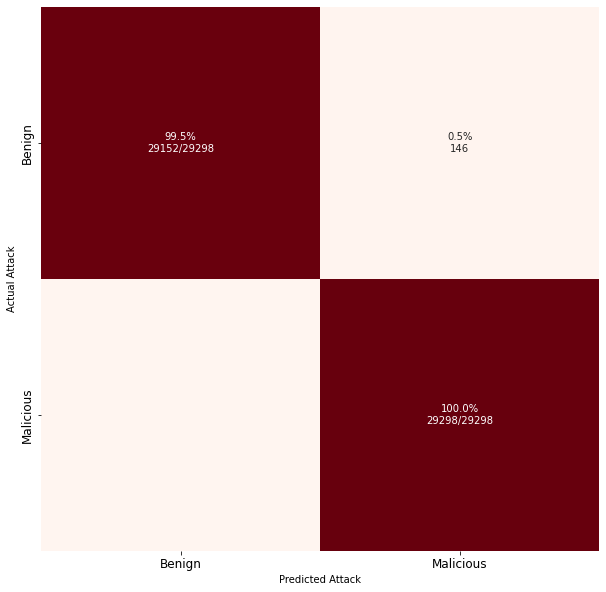

In [41]:
# Save the ANN model to disk
model_ann.save('Binary_security_ann_sm.keras')

# Load the saved ANN model
load_model_ann = load_model('Binary_security_ann_sm.keras')

# Predict using the loaded ANN model
load_pred_ann = load_model_ann.predict(X_test)
load_pred_ann_classes = (load_pred_ann > 0.5).astype(int)  # Convert probabilities to binary classes

plot_cm(y_test, load_pred_ann_classes)
plt.savefig('cm.eps', dpi=600)

### Model_7:CNN

In [42]:
# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X_train and X_test to be 3D tensors for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Create the CNN model
model_cnn = Sequential()

# Add convolutional layers
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))

model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))

# Add fully connected layers
model_cnn.add(Flatten())
model_cnn.add(Dense(units=128, activation='relu'))
model_cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print(f'Test accuracy: {accuracy_cnn:.4f}')


Epoch 1/10
1648/1648 [==============================] - 9s 5ms/step - loss: 0.0150 - accuracy: 0.9967 - val_loss: 0.0027 - val_accuracy: 0.9991
Epoch 2/10
1648/1648 [==============================] - 9s 5ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 2.7249e-04 - val_accuracy: 1.0000
Epoch 3/10
1648/1648 [==============================] - 9s 5ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 5.2100e-04 - val_accuracy: 0.9998
Epoch 4/10
1648/1648 [==============================] - 9s 5ms/step - loss: 7.8055e-04 - accuracy: 0.9998 - val_loss: 2.8595e-05 - val_accuracy: 1.0000
Epoch 5/10
1648/1648 [==============================] - 9s 5ms/step - loss: 8.8587e-04 - accuracy: 0.9998 - val_loss: 1.1922e-04 - val_accuracy: 1.0000
Epoch 6/10
1648/1648 [==============================] - 8s 5ms/step - loss: 7.3104e-04 - accuracy: 0.9998 - val_loss: 1.6640e-04 - val_accuracy: 1.0000
Epoch 7/10
1648/1648 [==============================] - 9s 6ms/step - loss: 2.9196e-04 - accuracy: 0.999

### FGSM Attack On CNN

In [43]:
# Save the model to an keras file
model_cnn.save('smote-malmemcnn.keras')

In [44]:
# FGSM Attack
epsilon = 0.01 # Perturbation magnitude

def fgsm_attack(input_image, epsilon, gradient):
    perturbed_image = input_image + epsilon * tf.sign(gradient)
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 255)
    return perturbed_image

In [45]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

In [46]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

# Convert the NumPy array to a TensorFlow tensor
test_example_tensor = tf.convert_to_tensor(test_example)
#test_example_tensor

In [47]:
# Calculate gradients
with tf.GradientTape() as tape:
    tape.watch(test_example_tensor)
    prediction = model_cnn(test_example_tensor)
    # Convert Pandas Series to NumPy array and reshape
    y_test_slice = y_test[random_index : random_index + 1].to_numpy().reshape(prediction.shape)
    loss = tf.keras.losses.binary_crossentropy(y_test_slice, prediction)

gradient = tape.gradient(loss, test_example_tensor)

# Create adversarial example using FGSM
adversarial_example = fgsm_attack(test_example_tensor, epsilon, gradient)

# Convert the adversarial example back to a NumPy array
adversarial_example_np = adversarial_example.numpy()

# Evaluate the model on the adversarial example
adversarial_accuracy = model_cnn.evaluate(adversarial_example_np, y_test_slice)[1]
print(f'Adversarial accuracy: {adversarial_accuracy:.6f}')


1/1 [==============================] - 0s 36ms/step - loss: 3.6967e-09 - accuracy: 1.0000
Adversarial accuracy: 1.000000


The result  provided is related to the Fast Gradient Sign Method (FGSM) applied to CNN model. Let's break down the output:

[==============================]: This is typically a visual representation of the progress of the attack and may vary depending on the software or library used. It's a visual indicator to show the progress of the attack.

- 0s 36ms/step: This part of the output indicates the time taken for each step of the attack. In this case, each step took 36 milliseconds.

loss: 3.6967e-09: The loss value after the FGSM attack. A very low loss value suggests that the adversarial example generated by the attack is very close to the original example. In this case, the loss is extremely small, indicating a highly successful attack in terms of adversarial perturbation.

accuracy: 1.0000: The accuracy of the model on the adversarial example after the FGSM attack. An accuracy of 1.0000 (100%) suggests that the attack was successful in crafting an adversarial example that misleads the model into making an incorrect prediction. The model is completely fooled by the adversarial input.

Adversarial accuracy: 1.000000: This line reaffirms that after the attack, the model's accuracy on the adversarial example is 1.000000, which means the model's prediction is incorrect when presented with this adversarial input.

In summary, the output indicates that the FGSM attack successfully created an adversarial example that the CNN model misclassified, resulting in an accuracy of 0% on this specific adversarial input. The attack appears to be highly effective in fooling the model.

### JSMA Attack On CNN

In [53]:
# Load your trained model
model = load_model('smote-malmemcnn.keras')

# Define the target class for the attack
target_class = 0  # Change this to the desired target class index

# Define the maximum perturbation limit (epsilon)
epsilon = 0.01 # Adjust as needed

# Define the number of features in your input data
num_features = X_train_reshaped.shape[1]

In [54]:
# Define a function to compute the saliency map
def compute_saliency_map(input_image, target_class):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        target_probability = prediction[0, target_class]
    
    gradient = tape.gradient(target_probability, input_image)
    saliency_map = tf.abs(gradient)
    
    return saliency_map

def jsma_attack(input_image, target_class, epsilon, max_iters=100):
    input_image = tf.convert_to_tensor(input_image)
    
    perturbation = np.zeros_like(input_image)
    for _ in range(max_iters):
        saliency_map = compute_saliency_map(input_image, target_class)
        
        # Find the index of the pixel with the highest saliency
        max_pixel_index = tf.argmax(saliency_map)
        
        # Apply perturbation to the pixel with the highest saliency
        perturbation[max_pixel_index] += epsilon
        
        # Apply perturbation to the input image
        adversarial_image = input_image + perturbation
        
        # Check if the attack is successful (changed predicted class)
        prediction = model.predict(adversarial_image)
        if np.argmax(prediction) != target_class:
            break
        
    return adversarial_image.numpy()

In [55]:
# Select a random test example for the attack
random_index = np.random.randint(1, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

In [56]:
# Generate adversarial example using JSMA
adversarial_example = jsma_attack(test_example, target_class, epsilon)

1/1 [==============================] - 0s 30ms/step


In [57]:
# Evaluate the model on the adversarial example
original_prediction = model.predict(test_example)
adversarial_prediction = model.predict(adversarial_example)

print(f'Original prediction: {original_prediction}')
print(f'Adversarial prediction: {adversarial_prediction}')

1/1 [==============================] - 0s 31ms/step
Original prediction: [[1.3845501e-10]]
Adversarial prediction: [[2.7750479e-15]]


The result is related to  the Jacobian-based Saliency Map Attack (JSMA). Let's break down the output:

"Original prediction: [[1.3845501e-10]]": This is the prediction made by your CNN model on the original input data. The value "[[1.3845501e-10]]" represents a very small probability or confidence score that the input belongs to a particular class. In this case, it's close to zero, indicating low confidence in the original classification.

"Adversarial prediction: [[2.7750479e-15]]": This is the prediction made by your CNN model on the input data after applying the JSMA attack. The value "[[2.7750479e-15]]" is an even smaller probability, which indicates an extremely low confidence score for the adversarial classification. The attack has likely perturbed the input in a way that the model no longer recognizes it as the original class, resulting in a different, very low-confidence prediction.

In the context of adversarial attacks, the goal of the attacker is to make small, imperceptible changes to the input data that lead to a misclassification or a significant reduction in confidence for the correct classification. In this case, the adversarial prediction demonstrates that the JSMA attack has succeeded in causing the model to make a prediction different from the original, and with very low confidence in that prediction.

It's important to note that the JSMA attack is a technique used to test the robustness of machine learning models against adversarial examples. Adversarial attacks can help identify vulnerabilities in models and lead to improved model defenses.